In [32]:
import matplotlib.pyplot as plt 
from gen_estimator import *
import math

In [33]:
V_0 = 0
n_0 = 0.317676914
m_0 = 0.0529324854
h_0 = 0.596120753

C = 1
V_Na = 115
V_k = -12
V_L = 10.6


_g_Na = 120
_g_K = 36
_g_l = 0.3



def g_Na(t,state):
    return _g_Na * state['m']**3 * state['h']
def g_k(t,state):
    return _g_K * state['n'] ** 4
def g_l(t,state):
    return _g_l


In [34]:
def I_Na(t,state):
    return g_Na(t,state)* (state['V'] - V_Na)
def I_K(t,state):
    return g_k(t,state) * (state['V']- V_k)
def I_L(t,state):
    return g_l(t,state) * (state['V'] - V_L)

In [35]:
def alp_n(t,state):
    return (0.01 * (10 - state['V'])) / (math.exp(0.1 * (10 - state['V'])) - 1)
    
def beta_n(t,state):
    return 0.125 * math.exp(state['V'] / -80)
def alp_m(t,state):
    return (0.1 * (25 - state['V'])) / (math.exp(0.1 * (25 - state['V'])) - 1)

def beta_m(t,state):
    return 4 * math.exp(state['V'] / -18)

def alp_h(t,state):
    return 0.07 * math.exp(state['V'] / -20)
    
def beta_h(t,state):
    return 1 / (math.exp(0.1 * (30 - state['V'])) + 1)
    


In [36]:


def s(t):
    if (10 <= t <= 11) or (20 <= t <= 21) or (30 <= t <= 40) or (50 <= t <= 51) or (53 <= t <= 54) or (56 <= t <= 57) or (59 <= t <= 60) or (62 <= t <= 63) or (65 <= t <= 66):
        return 150
    else:
        return 0



def dV_dt(t,state):
    return s(t) - I_Na(t, state) - I_K(t, state) - I_L(t, state)
def dn_dt(t,state):
    return alp_n(t,state) * (1 - state['n']) - beta_n(t,state) * state['n']

def dm_dt(t,state):
    return alp_m(t,state) * (1 - state['m']) - beta_m(t,state) * state['m']

def dh_dt(t,state):
    return alp_h(t, state) * (1 - state['h']) - beta_h(t, state) * state['h']


derivatives = {
    'V': dV_dt,
    'n': dn_dt,
    'm': dm_dt,
    'h': dh_dt
}

In [37]:
initial_state = {'V':V_0, 'n':n_0, 'm':m_0, 'h':h_0}
hh = gen_estimator(derivatives)
est_points = hh.calc_estimated_points((0,initial_state),0.01,8000)
x_axs = [p[0] for p in est_points]
v_axs = [p[1]['V'] for p in est_points]
n_axs = [p[1]['n'] for p in est_points]
m_axs = [p[1]['m'] for p in est_points]
h_axs = [p[1]['h'] for p in est_points]
s_axs = [s(p) for p in x_axs]


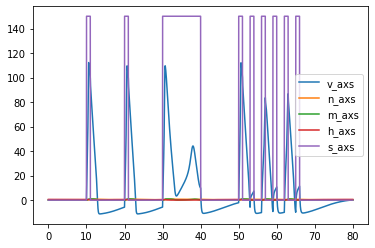

In [38]:
plt.plot(x_axs,v_axs, label="v_axs")
plt.plot(x_axs,n_axs, label="n_axs")
plt.plot(x_axs,m_axs, label="m_axs")
plt.plot(x_axs,h_axs, label="h_axs")
plt.plot(x_axs,s_axs, label="s_axs")
plt.legend()
plt.show()